# **Big Data for Decision Making - Groupwork**

Candidate numbers - 210197062, 210247747, 210018055, 210276987, 210018653


# Introduction
## Business objective - Helping Budget Auto Insurance

Vehicle insurance company - *Budget Auto Insurance* is looking to optimize its revenue with the power of public domain data on the accidents available in UK government website. The aim is to utilize vital information regarding the accident data and create a predictive modelling based on the various variables which can be collected from customers such as vehicle type, age of the drive, sex of the driver, engine capacity of the vehicle, driver home area type, propulsion code etc. to predict the type of accident severity that can be anticipated from the customer and model the insurance premium cost based on this target variable. Doing this would be beneficial to the company by ensuring the right amount of premium is collected from customers more prone to severe accidents and also gain more customers by providing lower premium to those who are not prone to severe accidents. 

# Big data group assignment-Road safety dataset UK


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

##Importing libraries and setting up the dataset


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
#from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

To have more comprehensive perspective of the data we are considering 3 years (2020, 2019, 2018) of data regarding accidents, casualty and vehicles. We have not considered 2021 data as it is unvalidated. The data source is UK department for transport - (https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)

In [3]:
#Importing 2020_dataset from UK government website
a_df2 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2020.csv", low_memory = False)
v_df2 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-2020.csv", low_memory = False)
c_df2 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2020.csv", low_memory = False)
#Merging dataset
df_p2= pd.merge(a_df2,v_df2, how ='outer',on = 'accident_index')
df_raw2=pd.merge(df_p2,c_df2, how ='outer',on = 'accident_index')
df_raw2.shape

(220435, 79)

In [4]:
#Importing 2019_dataset from UK government website
a_df3 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2019.csv", low_memory = False)
v_df3 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-2019.csv", low_memory = False)
c_df3 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2019.csv", low_memory = False)
#Merging dataset
df_p3= pd.merge(a_df3,v_df3, how ='outer',on = 'accident_index')
df_raw3=pd.merge(df_p3,c_df3, how ='outer',on = 'accident_index')
df_raw3.shape

(295579, 79)

In [5]:
#Importing 2018_dataset from UK government website
a_df4 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2018.csv",low_memory = False)
v_df4 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-vehicle-2018.csv",low_memory = False)
c_df4 = pd.read_csv("https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2018.csv",low_memory = False)
#Merging dataset
df_p4= pd.merge(a_df4,v_df4 ,how ='outer',on = 'accident_index')
df_raw4=pd.merge(df_p4,c_df4, how ='outer',on = 'accident_index')
df_raw4.shape

(311415, 79)

## Data inspection

In [6]:
df_raw = pd.concat([df_raw2,df_raw3,df_raw4])
df_raw.shape

(827429, 79)

In [7]:
pd.set_option("display.max_columns", None)
df_raw.tail()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,accident_reference_y,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year,accident_reference,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
311410,2018984116018,2018,984116018,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,20/12/2018,5,18:00,917,S12000006,S12000006,4,7076,6,30,0,-1,-1,-1,0,0,4,1,2,0,0,2,1,-1,-1,2018,984116018,1,9,0,9,8,6,0,0,0,0,0,0,3,1,6,1,67,10,998,1,4,-1,6,3,2018,984116018,2,1,2,1,18,4,3,0,0,1,0,0,9,2,4
311411,2018984116018,2018,984116018,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,20/12/2018,5,18:00,917,S12000006,S12000006,4,7076,6,30,0,-1,-1,-1,0,0,4,1,2,0,0,2,1,-1,-1,2018,984116018,2,9,0,15,8,4,0,0,1,0,7,4,4,1,6,1,24,5,3000,2,21,-1,7,3,2018,984116018,2,1,2,1,18,4,3,0,0,1,0,0,9,2,4
311412,2018984116018,2018,984116018,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,20/12/2018,5,18:00,917,S12000006,S12000006,4,7076,6,30,0,-1,-1,-1,0,0,4,1,2,0,0,2,1,-1,-1,2018,984116018,3,9,0,2,0,-1,6,0,0,0,0,0,4,1,6,3,-1,-1,2400,2,5,-1,-1,-1,2018,984116018,2,1,2,1,18,4,3,0,0,1,0,0,9,2,4
311413,2018984116318,2018,984116318,318858.0,566932.0,-3.269695,54.990344,98,2,1,1,24/12/2018,2,11:50,917,S12000006,S12000006,5,0,6,60,3,4,6,0,0,0,1,1,4,0,0,2,1,-1,-1,2018,984116318,1,2,0,18,1,5,0,1,1,0,0,0,3,1,1,1,60,9,49,1,10,-1,6,3,2018,984116318,1,1,1,1,60,9,2,0,0,0,0,0,2,3,6
311414,2018984116418,2018,984116418,316008.0,568771.0,-3.314764,55.006392,98,3,1,1,31/12/2018,2,07:10,917,S12000006,S12000006,4,7020,6,60,0,-1,-1,-1,0,0,6,1,1,0,7,2,2,-1,-1,2018,984116418,1,9,0,18,4,8,0,0,0,12,0,0,1,1,2,2,21,5,899,1,5,-1,6,2,2018,984116418,1,1,1,2,21,5,3,0,0,0,0,0,9,2,6


##Data Spliting using Stratified sampling method

To have a testset and trainset representative of the population we use stratified sampling on the target variable - accident severity

In [8]:
#Using stratified sampling the imbalanced dataset is splitted into 80% training and 20% testing data based on "accident_severity" variable
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

train_index, test_index = list(stratified_splitter.split(df_raw, df_raw["accident_severity"]))[0]
trainset = df_raw.iloc[train_index]
testset = df_raw.iloc[test_index]
print(f"There are {trainset.shape[0]} train and {testset.shape[0]} test instances")

There are 661943 train and 165486 test instances


In [9]:
#Checking whether the distribution of variable is homogeneous
trainset["accident_severity"].value_counts(normalize=True)

3    0.783046
2    0.198162
1    0.018792
Name: accident_severity, dtype: float64

In [10]:
testset["accident_severity"].value_counts(normalize=True)

3    0.783045
2    0.198162
1    0.018793
Name: accident_severity, dtype: float64

##Feature Selection and engineering

For the insurance company ABC as discussed above some of the relevant factors that are into consideration - 
1. Vehicle type
2. Age of driver
3. Sex of driver
4. Driver home area type
5. Driver IMD decile
6. Engine capacity
7. Propulsion code
8. Age of vehicle

These variables in our business context are more relatable to the target variable accident severity, hence our collective decision to proceed with the above variables.

In [11]:
#Required predictors are selected on the basis of background knowleadge which are relavent to this business problem 
trainset.drop(trainset.columns.difference(['accident_severity','age_of_driver','sex_of_driver','vehicle_type','age_band_of_driver','driver_home_area_type','driver_imd_decile','engine_capacity_cc','propulsion_code','accident_year_y','age_of_vehicle', 'longitude', 'latitude']), axis = 1, inplace = True)
trainset.head()

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
83495,-2.177585,53.408598,2,2018,5,1,25,5,999,1,11,7,1
25213,-0.092945,51.379843,3,2020,3,1,25,5,124,1,3,5,1
70629,-1.853969,54.962991,2,2020,3,1,25,5,125,1,0,4,1
112496,-1.395007,53.709824,3,2018,9,1,33,6,-1,-1,-1,2,1
207137,-1.114659,51.323111,3,2019,19,1,39,7,-1,-1,-1,5,1


In [12]:
testset.drop(testset.columns.difference(['accident_severity','age_of_driver','sex_of_driver','vehicle_type','age_band_of_driver','driver_home_area_type','driver_imd_decile','engine_capacity_cc','propulsion_code','accident_year_y','age_of_vehicle','longitude', 'latitude']), axis = 1, inplace = True)


###Binning and labelling categorical variables

In [13]:
print('The total categorical values before binning')
totcat_veh_typ = trainset.vehicle_type.nunique()
print(f'The number of categories under vehicle type attribute is - {totcat_veh_typ}')

totcat_prop_cod = trainset.propulsion_code.nunique()
print(f'The number of categories under propulsion code attribute is - {totcat_prop_cod}')

totcat_age_band = trainset.age_band_of_driver.nunique()
print(f'The number of categories under age band of driver attribute is - {totcat_age_band}')

The total categorical values before binning
The number of categories under vehicle type attribute is - 22
The number of categories under propulsion code attribute is - 11
The number of categories under age band of driver attribute is - 12


Since there is a high number of categories under the categorical variables - Vehicle type, Propulsion code and Age band of driver. We improve the dataset quality by binning the variables into more pertinent groups in order to improve predictive performance.  


In [14]:
# defining dictionaries for variable binning
cartype_dict = {1: 'Pedal cycle', 2: 'Motorcycle 50cc and under', 3: 'Motorcycle 125cc and under', 4: 'Motorcycle over 125cc and up to 500cc', 5: 'Motorcycle over 500cc', 8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8 - 16 passenger seats)', 11: 'Bus or coach (17 or more pass seats)', 16: 'Ridden horse', 17: 'Agricultural vehicle', 18: 'Tram', 19: 'Van / Goods 3.5 tonnes mgw or under', 20: 'Goods over 3.5t. and under 7.5t', 21: 'Goods 7.5 tonnes mgw and over', 22: 'Mobility scooter', 23: 'Electric motorcycle', 90: 'Other vehicle', 97: 'Motorcycle - unknown cc', 98: 'Goods vehicle - unknown weight', 99: 'Unknown vehicle type (self rep only)', 103: 'Motorcycle - Scooter (1979-1998)', 104: 'Motorcycle (1979-1998)', 105: 'Motorcycle - Combination (1979-1998)', 106: 'Motorcycle over 125cc (1999-2004)', 108: 'Taxi (excluding private hire cars) (1979-2004)', 109: 'Car (including private hire cars) (1979-2004)', 110: 'Minibus/Motor caravan (1979-1998)', 113: 'Goods over 3.5 tonnes (1979-1998)', -1: np.nan, 90: 'Other vehicle' }
homearea_dict = {1: 'Urban area', 2: 'Small town', 3: 'Rural', -1: np.nan }
sex_dict = {1: 'Male', 2: 'Female', 3: 'Not Known', -1: np.nan }
ageband_dict = {1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4: '16 - 20', 5: '21 - 25', 6: '26 - 35', 7: '36 - 45', 8: '46 - 55', 9: '56 - 65', 10: '66 - 75', 11: 'Over 75', -1: np.nan}
severity_dict = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
prop_dict = {1: 'Petrol', 2: 'Heavy oil', 3: 'Electric', 4: 'Steam', 5: 'Gas', 6: 'Petrol/Gas (LPG)', 7: 'Gas/Bi-fuel', 8: 'Hybrid electric', 9: 'Gas Diesel', 10: 'New fuel technology', 11: 'Fuel cells', 12: 'Electric diesel', -1: np.nan}
prop_groups = {'Petrol': 'Petrol', 'Heavy oil': 'Heavy oil', 'Electric': 'Electric/Hybrid', 'Hybrid electric': 'Electric/Hybrid', 'Electric diesel': 'Electric/Hybrid', 'Steam': 'Others', 'Gas': 'Others', 'Gas Diesel': 'Others', 'Petrol/Gas (LPG)': 'Others', 'Gas/Bi-fuel': 'Others'}
vehicletype_groups = {'Electric motorcycle': 'Two-wheeler', 'Mobility scooter': 'Two-wheeler', 'Motorcycle 125cc and under': 'Two-wheeler', 'Motorcycle over 125cc and up to 500cc': 'Two-wheeler', 'Motorcycle over 500cc': 'Two-wheeler', 'Motorcycle 50cc and under': 'Two-wheeler', 'Motorcycle - unknown cc': 'Two-wheeler', 'Goods 7.5 tonnes mgw and over': 'Heavy  Cargo Vehicle', 'Goods over 3.5t. and under 7.5t': 'Heavy  Cargo Vehicle', 'Goods vehicle - unknown weight': 'Heavy  Cargo Vehicle', 'Van / Goods 3.5 tonnes mgw or under': 'Heavy  Cargo Vehicle', 'Bus or coach (17 or more pass seats)': 'Heavy Passenger Vehicle', 'Minibus (8 - 16 passenger seats)': 'Heavy Passenger Vehicle', 'Car': 'Car', 'Taxi/Private hire car': 'Car', 'Agricultural vehicle': 'Car', 'Other vehicle': 'Car', 'Unknown vehicle type (self rep only)': 'Car', 'Tram':np.nan, 'Ridden horse':np.nan}
ageband_groups = {'0 - 5':'Toddler','6 - 10':'Child','11 - 15':'Teen','16 - 20':'Teen','21 - 25':'Young Adult','26 - 35':'Young Adult','36 - 45':'Adult','46 - 55':'Adult','56 - 65':'Adult','66 - 75':'Elderly','Over 75':'Elderly'}

# defining a fuction that takes a dataframe, a column label and a dictionary
# and bins the variable data accordinggly to the dictionary and returns the 
# edited dataframe
def replace_all(df,column, dict):
    for i, j in dict.items():
        df[column] = df[column].replace(i, j).copy()    
    return df

# for both the training and testing datasets:
for dataset in [trainset, testset]:
  # replacing the -1 values for missing values, as it is what it means
  dataset.replace(-1, np.NaN, inplace=True)
  # setting the engine capacity of electric cars to 0, instead of missing so that they are not dropped in the future
  dataset.loc[dataset['propulsion_code']== 3, 'engine_capacity_cc'] = 0
  # binning all the variables needed
  replace_all(dataset,"vehicle_type",cartype_dict)
  replace_all(dataset,"sex_of_driver",sex_dict)
  replace_all(dataset,"age_band_of_driver",ageband_dict)
  replace_all(dataset,"driver_home_area_type",homearea_dict)
  replace_all(dataset,"propulsion_code",prop_dict)
  replace_all(dataset,"accident_severity",severity_dict)
  replace_all(dataset,"propulsion_code",prop_groups)
  replace_all(dataset,"vehicle_type",vehicletype_groups)
  replace_all(dataset,"age_band_of_driver",ageband_groups)

trainset.head()

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
83495,-2.177585,53.408598,Serious,2018,Two-wheeler,Male,25.0,Young Adult,999.0,Petrol,11.0,7.0,Urban area
25213,-0.092945,51.379843,Slight,2020,Two-wheeler,Male,25.0,Young Adult,124.0,Petrol,3.0,5.0,Urban area
70629,-1.853969,54.962991,Serious,2020,Two-wheeler,Male,25.0,Young Adult,125.0,Petrol,0.0,4.0,Urban area
112496,-1.395007,53.709824,Slight,2018,Car,Male,33.0,Young Adult,NaN,NaN,NaN,2.0,Urban area
207137,-1.114659,51.323111,Slight,2019,Heavy Cargo Vehicle,Male,39.0,Adult,NaN,NaN,NaN,5.0,Urban area


In [15]:
print('The total categorical values after binning')
totcat_veh_typ = trainset.vehicle_type.nunique()
print(f'The number of categories under vehicle type attribute is - {totcat_veh_typ}')

totcat_prop_cod = trainset.propulsion_code.nunique()
print(f'The number of categories under propulsion code attribute is - {totcat_prop_cod}')

totcat_age_band = trainset.age_band_of_driver.nunique()
print(f'The number of categories under age band of driver attribute is - {totcat_age_band}')

The total categorical values after binning
The number of categories under vehicle type attribute is - 5
The number of categories under propulsion code attribute is - 4
The number of categories under age band of driver attribute is - 6


## Univariate analysis

### Summary statistics - Age of driver

In the cell below we define a function for ease of use and future re-use to simplify the code and give it more clarity.

In [16]:
def summary_statistics_quant(df, column):   
    print("********************************************************************")
    print('CENTRAL TENDENCY')
    mean = df[column].mean()
    print(f"The mean of the variable - '{column}' is {mean}")
    mode = df[column].mode()[0]
    print(f"The mode of the variable - '{column}' is {mode}")
    median = df[column].median()
    print(f"The median of the variable - '{column}' is {median}")
    range_ = df[column].max() - df[column].min()
    print('SPREAD OF THE DATA')
    print(f"The range of the variable - '{column}' is {range_}")
    from scipy.stats import iqr
    iqr = iqr(df[column])
    print(f"The interquartile range of the variable - '{column}' is {iqr}")
    var = df[column].var()
    print(f"The variance of the variable - '{column}' is {var}")
    stddev = df[column].std()
    print(f"The standard deviation of the variable - '{column}' is {stddev}")
    mad = df[column].mad()
    print(f"The mean absolute deviation of the variable - '{column}' is {mad}")
    print("********************************************************************")

summary_statistics_quant(trainset, column = 'age_of_driver')

********************************************************************
CENTRAL TENDENCY
The mean of the variable - 'age_of_driver' is 40.790848396696255
The mode of the variable - 'age_of_driver' is 30.0
The median of the variable - 'age_of_driver' is 38.0
SPREAD OF THE DATA
The range of the variable - 'age_of_driver' is 101.0
The interquartile range of the variable - 'age_of_driver' is nan
The variance of the variable - 'age_of_driver' is 269.59827369259807
The standard deviation of the variable - 'age_of_driver' is 16.419448032519185
The mean absolute deviation of the variable - 'age_of_driver' is 13.58928106745264
********************************************************************


From the summary statistics we can see that the median age of drivers involved in accidents is 40, but the actual range varies from 20 to 60, with a steep decline after that. On top of this, the highest amount of accidents involve persons who are aged around 30.

### Visualization - Age of driver

The distribution and skewness of this variable are illustrated by the histogram and box plot below.

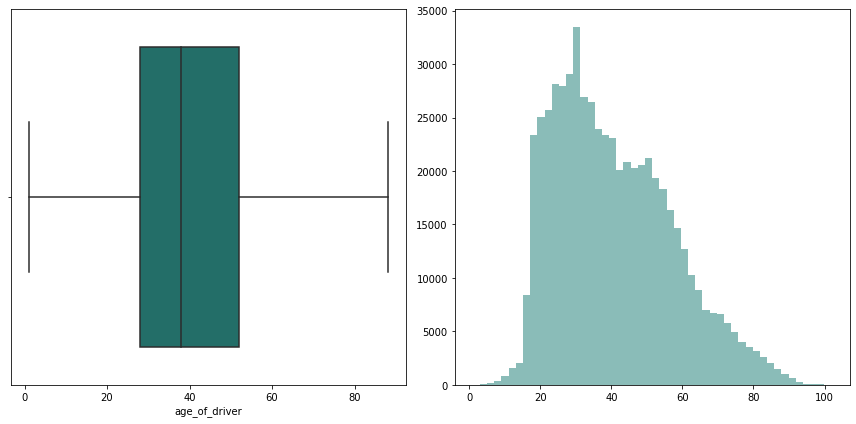

In [17]:
from matplotlib.pyplot import figure
sns.set_palette("BrBG_r")
figure(figsize=(12, 6))

#Boxplot
plt.subplot(1, 2, 1)
#Define plot object
sns.boxplot(x = 'age_of_driver', data = trainset, showfliers = False)

#Histogram
plt.subplot(1, 2, 2)
#Define plot object
plt.hist(x = 'age_of_driver', data = trainset, bins = 50, alpha = 0.5)
plt.tight_layout()

#Showing the plot
plt.show()

There are a few minors listed in the dataset which may indicate illegal driving of a car, but all in all, fairly even distributed data overall.

### Summary statistics - engine capacity in cc

In [18]:
summary_statistics_quant(trainset, column = 'engine_capacity_cc')

********************************************************************
CENTRAL TENDENCY
The mean of the variable - 'engine_capacity_cc' is 1868.4492192695193
The mode of the variable - 'engine_capacity_cc' is 1598.0
The median of the variable - 'engine_capacity_cc' is 1598.0
SPREAD OF THE DATA
The range of the variable - 'engine_capacity_cc' is 99999.0
The interquartile range of the variable - 'engine_capacity_cc' is nan
The variance of the variable - 'engine_capacity_cc' is 2480567.5373009634
The standard deviation of the variable - 'engine_capacity_cc' is 1574.9817577676777
The mean absolute deviation of the variable - 'engine_capacity_cc' is 734.7957219632317
********************************************************************


The mean of the engine capacity is 1868, which indicates that the cars involved in the accidents are mid-range, most probably family cars which have moderate fuel average range.

### Vizualization - engine capacity


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

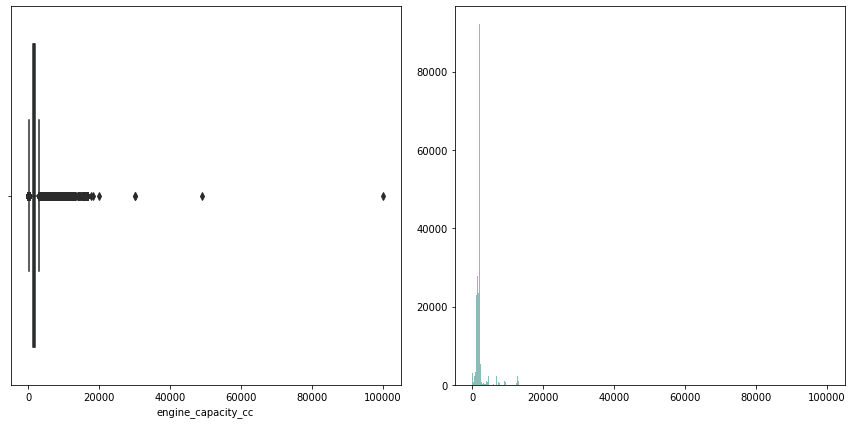

In [19]:
from matplotlib.pyplot import figure
sns.set_palette("BrBG_r")
figure(figsize=(12, 6))

#Boxplot
plt.subplot(1, 2, 1)
#Define plot object
sns.boxplot(x = 'engine_capacity_cc', data = trainset)

#Histogram
plt.subplot(1, 2, 2)
#Define plot object
plt.hist(x = 'engine_capacity_cc', data = trainset, bins = 1000, alpha = 0.5)
plt.tight_layout()

#Showing the plot
plt.show()

Most of the cars stay in the range of 1000-2000 cc capacity, with a lot of outliers in the low end which are indicative of electric vehicles with 0cc and motor vehicles with low cc, and also in the high end which may indicate the cars involved in those accidents may be sports cars and error in data

### Summary statistics - Accident severity

In [20]:
def summary_statistics_cat(df, column):
    print("********************************************************************")
    print('CENTRAL TENDENCY')
    mode = df[column].mode()[0]
    print(f"The mode of the variable - '{column}' is {mode}")
    print('SPREAD OF THE DATA')
    count = df[column].value_counts()
    print(f"The count of values for the variable - '{column}' is")
    print(count)
    count_prop = df[column].value_counts(normalize = True)
    print(f"The proportion of categories for the variable - '{column}' is ")
    print(count_prop)
    print("********************************************************************")

summary_statistics_cat(trainset, 'accident_severity')

********************************************************************
CENTRAL TENDENCY
The mode of the variable - 'accident_severity' is Slight
SPREAD OF THE DATA
The count of values for the variable - 'accident_severity' is
Slight     518332
Serious    131172
Fatal       12439
Name: accident_severity, dtype: int64
The proportion of categories for the variable - 'accident_severity' is 
Slight     0.783046
Serious    0.198162
Fatal      0.018792
Name: accident_severity, dtype: float64
********************************************************************


From the statistics, we can see that the majority of accidents have been categorized as "Slight severity", with a 78% presence. In contrast, less than 2% of the accidents have been fatal, with "Serious" accidents making up the 19% missing.

### Vizualization - accident_severity

The plot below illustrates the 'counts' for this variable.

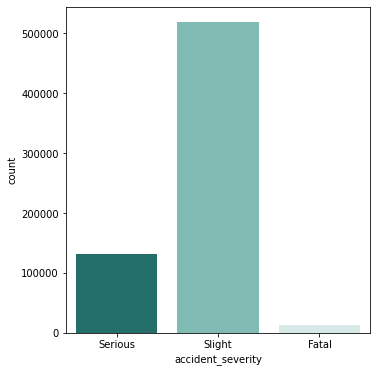

In [21]:
def categorical_viz(df, column):    
    sns.set_palette("BrBG_r")
    figure(figsize=(12, 6))

    #Boxplot
    plt.subplot(1, 2, 1)
    #Define plot object
    sns.countplot(x = column, data = df)
    
#Showing the plot
categorical_viz(trainset, 'accident_severity')

There are far fewer "Serious" accidents that "Slight" accidents, with a very small count of accidents categorized as "Fatal"

### Summary statistics - age_of_vehicle 

In [22]:
summary_statistics_quant(trainset, 'age_of_vehicle')

********************************************************************
CENTRAL TENDENCY
The mean of the variable - 'age_of_vehicle' is 7.896735432612521
The mode of the variable - 'age_of_vehicle' is 1.0
The median of the variable - 'age_of_vehicle' is 7.0
SPREAD OF THE DATA
The range of the variable - 'age_of_vehicle' is 96.0
The interquartile range of the variable - 'age_of_vehicle' is nan
The variance of the variable - 'age_of_vehicle' is 30.48158600951704
The standard deviation of the variable - 'age_of_vehicle' is 5.5210131325253196
The mean absolute deviation of the variable - 'age_of_vehicle' is 4.562246347355141
********************************************************************


The mean of the age of the cars involved in accidents is almost 8 years, which may raise concerns regarding the safety of the driver. On top of this, older cars may end up being damaged more than newer cars, which may cost the insurance company more to cover.

### Vizualization - age_of_vehicle

The distribution and skewness of this variable are illustrated by the histogram and box plot below.

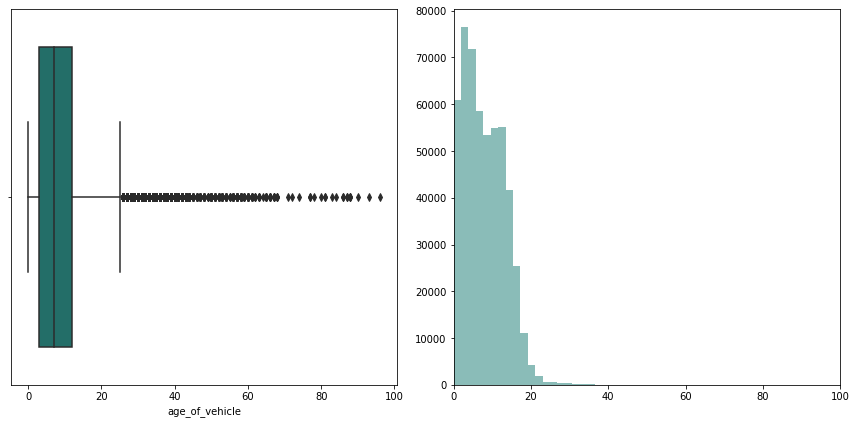

In [23]:
from matplotlib.pyplot import figure
sns.set_palette("BrBG_r")
figure(figsize=(12, 6))

#Boxplot
plt.subplot(1, 2, 1)
#Define plot object
sns.boxplot(x = 'age_of_vehicle', data = trainset)

#Histogram
plt.subplot(1, 2, 2)
plt.xlim(0,100)
#Define plot object
plt.hist(x = 'age_of_vehicle', data = trainset, bins = 50, alpha = 0.5)
plt.tight_layout()

#Showing the plot
plt.show()

There can be seen a few outliers which consist of cars older than 20 years, but the majority of them are no older than 15 years. As seen in the histogram, the newer the car is, the higher probabilty of an accident, which may signal the insurance company to target individuals who recently bought a car.

### Summary statistics - vehicle_type

In [24]:
summary_statistics_cat(trainset, 'vehicle_type')

********************************************************************
CENTRAL TENDENCY
The mode of the variable - 'vehicle_type' is Car
SPREAD OF THE DATA
The count of values for the variable - 'vehicle_type' is
Car                        504131
Heavy  Cargo Vehicle        55227
Two-wheeler                 44948
Pedal cycle                 43671
Heavy Passenger Vehicle     13231
Name: vehicle_type, dtype: int64
The proportion of categories for the variable - 'vehicle_type' is 
Car                        0.762439
Heavy  Cargo Vehicle       0.083524
Two-wheeler                0.067979
Pedal cycle                0.066047
Heavy Passenger Vehicle    0.020010
Name: vehicle_type, dtype: float64
********************************************************************


The majority of accidents involve standard cars, more precisely 76%. This may signal the insurancy company to focus on retail cars, and dedicate their attention on how to assess the value and damages which may follow after an accident.

### Vizualization - vehicle_type

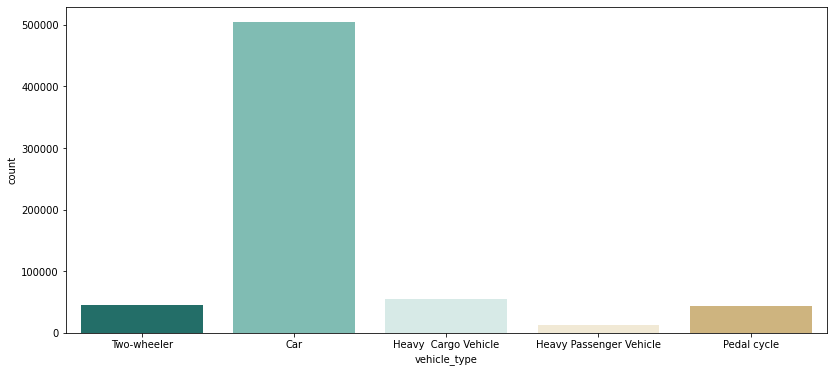

In [25]:
def categorical_viz_temp(df, column):    
    sns.set_palette("BrBG_r")
    figure(figsize=(30, 6))

    #Boxplot
    plt.subplot(1, 2, 1)
    #Define plot object
    sns.countplot(x = column, data = df)

#Showing the plot
categorical_viz_temp(trainset, 'vehicle_type')

There are far more accidents involving normal cars than other types of vehicles, but a small percentage of accidents are represented by cyclists which are not of interest to the insurance company.

### Summary statistics - age_band_of_driver

In [26]:
summary_statistics_cat(trainset, 'age_band_of_driver')

********************************************************************
CENTRAL TENDENCY
The mode of the variable - 'age_band_of_driver' is Adult
SPREAD OF THE DATA
The count of values for the variable - 'age_band_of_driver' is
Adult          273706
Young Adult    210165
Elderly         50301
Teen            48508
Child             910
Toddler           111
Name: age_band_of_driver, dtype: int64
The proportion of categories for the variable - 'age_band_of_driver' is 
Adult          0.468915
Young Adult    0.360056
Elderly        0.086176
Teen           0.083104
Child          0.001559
Toddler        0.000190
Name: age_band_of_driver, dtype: float64
********************************************************************


A very small percentage of the drivers have been categorized as "minors" which may indicate that they have been involved in the accident and not the ones causing it. The majority of people fall into the "Adult" or "Young adult" category, with far fewer "Elderly" people which may signify that elderly persons use their cars less or are more careful when driving. But taking into consideration the decrease in reflexes and coordination as we grow older, the former may apply in this case.

### Vizualization - age_band_of_driver


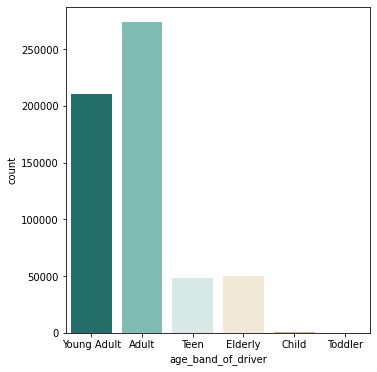

In [27]:
#Showing the plot
categorical_viz(trainset, 'age_band_of_driver')

The graph showing the "counts" of every inidividual age group.

### Summary statistics - propulsion_code


In [28]:
summary_statistics_cat(trainset, 'propulsion_code')

********************************************************************
CENTRAL TENDENCY
The mode of the variable - 'propulsion_code' is Petrol
SPREAD OF THE DATA
The count of values for the variable - 'propulsion_code' is
Petrol             272016
Heavy oil          232460
Electric/Hybrid     14307
Others                528
Name: propulsion_code, dtype: int64
The proportion of categories for the variable - 'propulsion_code' is 
Petrol             0.523802
Heavy oil          0.447632
Electric/Hybrid    0.027550
Others             0.001017
Name: propulsion_code, dtype: float64
********************************************************************


A great majority of cars still run on Petrol or Heavy Oil, with Electric/Hybrid cars still making an entrance in the market, being only 2% of the cars that are involved in accidents. This may give the insurance company a direction to follow regarding which types of cars most people use.

### Vizualization - propulsion_code

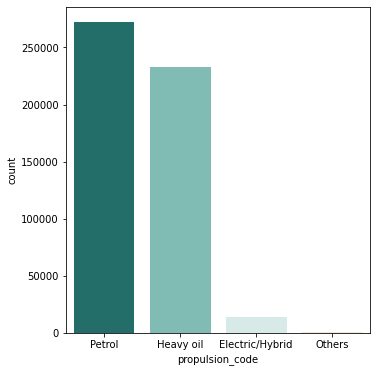

In [29]:
#Showing the plot
categorical_viz(trainset, 'propulsion_code')

The graph which shows the "count" of each individual car and what it runs on. As seen above, petrol and heavy oil highly outclass the other types of propulsion codes.

### Summary statistics - driver_imd_decile

In [30]:
summary_statistics_cat(trainset, 'driver_imd_decile')

********************************************************************
CENTRAL TENDENCY
The mode of the variable - 'driver_imd_decile' is 2.0
SPREAD OF THE DATA
The count of values for the variable - 'driver_imd_decile' is
2.0     64078
3.0     62331
1.0     61029
4.0     60563
5.0     57680
6.0     55193
7.0     51256
8.0     48759
9.0     45662
10.0    39831
Name: driver_imd_decile, dtype: int64
The proportion of categories for the variable - 'driver_imd_decile' is 
2.0     0.117277
3.0     0.114080
1.0     0.111697
4.0     0.110844
5.0     0.105567
6.0     0.101015
7.0     0.093810
8.0     0.089240
9.0     0.083572
10.0    0.072900
Name: driver_imd_decile, dtype: float64
********************************************************************


Summary statistics show a fairly distributed range of multiple deprivation, which means that a person's financial situation does not matter that much when it comes to the severity of an accident, and it can happen to anyone, regardless of their income.

### Vizualization - driver_imd_decile

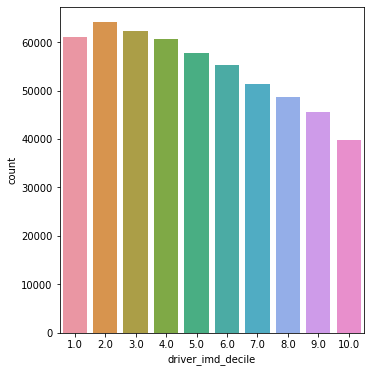

In [31]:
#Showing the plot
categorical_viz(trainset, 'driver_imd_decile')

Although the counts are fairly evenly distributed, a consistent decrease can be seen as a person has more income, which may mean that they can afford higher-end cars that come with better safety features which decrease the severity of accidents, but at the same time cost more.

##Bivariate Analysis

Bivariate analysis is conducted between the target variable and the predictors in the dataset to understand the association between them.

###Accident severity and Age band of driver

In [32]:
#Contingency table is created between the variables "accident_severity" and "age_band_of_driver"
cont_table = pd.crosstab(trainset['accident_severity'], trainset['age_band_of_driver'])
cont_table

age_band_of_driver,Adult,Child,Elderly,Teen,Toddler,Young Adult
accident_severity,,,,,,
Fatal,5704,1,1725,756,4,3752
Serious,56229,169,12806,10891,19,40591
Slight,211773,740,35770,36861,88,165822


####Visualization of "Accident severity" and "Age band of driver"

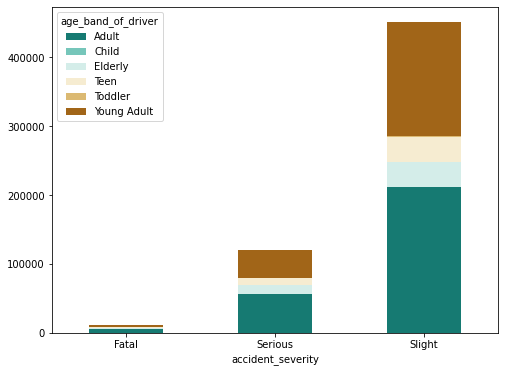

In [33]:
cont_table.plot(kind="bar", stacked=True, rot=0,figsize=(8,6))

The above graph shows that the category "adult" in age band of driver is most prone to the accident in every category of accident severity followed by "Young Adult".

####Dependency test on "Accident severity" and "Age band of driver" 


As both are categorial variables , we conduct Chi-Square test on them.

Null Hypothesis(H0) : No dependency between the variables 

Alternate Hypothesis (H1): The variables are dependent on each other

In [34]:
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 0.0


By looking at the p-value which is less than the usual significance level of 0.05 , **we reject the null hypothesis that there is no dependence between "Accident severity" and "Age band of driver"**.


###Accident severity and sex of driver

####Visualization of "Accident severity" and "sex of driver"

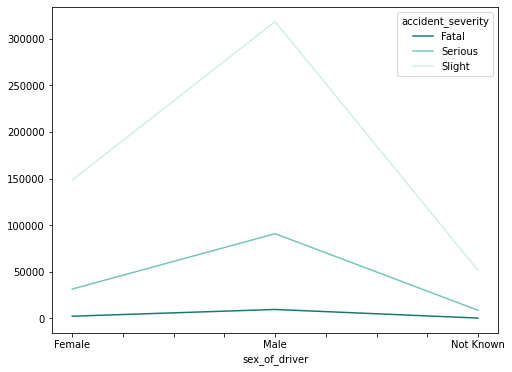

In [35]:
b=trainset.groupby('sex_of_driver')['accident_severity'].value_counts().unstack()
b.plot(figsize=(8,6))

The above graph clearly depicts that the male drivers are vulnerable to each category under accident severity.

###Accident severity and Vehicle type

In [36]:
#Contingency table is created between the variables "accident_severity" and "vehicle_type"
cont_table2 = pd.crosstab(trainset['accident_severity'], trainset['vehicle_type'])
cont_table2

vehicle_type,Car,Heavy Cargo Vehicle,Heavy Passenger Vehicle,Pedal cycle,Two-wheeler
accident_severity,,,,,
Fatal,8686,1819,341,375,1211
Serious,92113,11131,2577,10274,14912
Slight,403332,42277,10313,33022,28825


####Visualization of "Accident severity" and "Vehicle type"

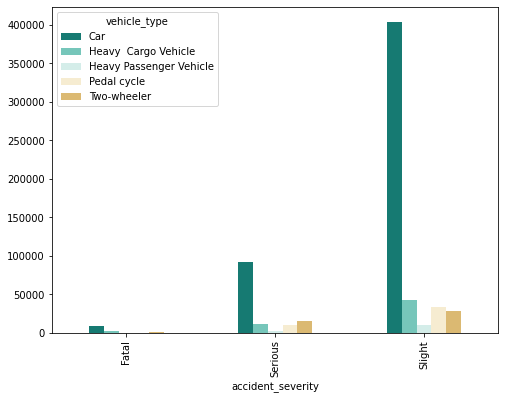

In [37]:
cont_table2.plot(kind="bar",figsize=(8,6))

The above graph shows that the vehicle type "Car" is leading all other vehicle type in means of accident severity as expected.

####Dependency test on "Accident severity" and "Vehicle type" 

In [38]:
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table2)
print(f"p-value: {p_val}")

p-value: 0.0


By looking at the p-value which is less than the usual significance level of 0.05 , **we reject the null hypothesis that there is no dependence between "Accident severity" and "Vehicle type"**.

###Accident severity and Accident year

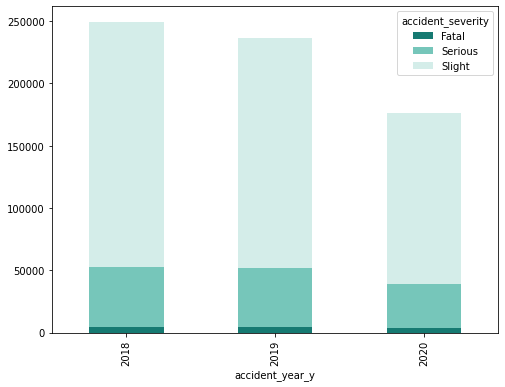

In [39]:
c=trainset.groupby('accident_year_y')['accident_severity'].value_counts().unstack()
c.plot(kind='bar',stacked=True,figsize=(8,6))

The above graph depicts that the frequency of accident is reducing gradually from previous year which shows the improvement of road safety. On the other hand it is noted that there is drastic reduce in accident by the year 2020, this may be due to covid restrictions and lockdown. 

##Dropping all the null values from the dataset

In [40]:
#Percentage of missing values in the dataset is obtained
trainset.isna().mean().round(4) * 100

longitude                 0.03
latitude                  0.03
accident_severity         0.00
accident_year_y           0.00
vehicle_type              0.11
sex_of_driver             0.00
age_of_driver            11.82
age_band_of_driver       11.82
engine_capacity_cc       21.62
propulsion_code          21.55
age_of_vehicle           21.62
driver_imd_decile        17.46
driver_home_area_type    17.42
dtype: float64

In [41]:
df_train_clean=trainset.dropna().reset_index(drop = True)
df_train_clean.head()

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,-2.177585,53.408598,Serious,2018,Two-wheeler,Male,25.0,Young Adult,999.0,Petrol,11.0,7.0,Urban area
1,-0.092945,51.379843,Slight,2020,Two-wheeler,Male,25.0,Young Adult,124.0,Petrol,3.0,5.0,Urban area
2,-1.853969,54.962991,Serious,2020,Two-wheeler,Male,25.0,Young Adult,125.0,Petrol,0.0,4.0,Urban area
3,-2.190595,53.853124,Slight,2018,Car,Female,28.0,Young Adult,998.0,Petrol,10.0,2.0,Urban area
4,-0.204440,51.488573,Serious,2019,Two-wheeler,Male,17.0,Teen,108.0,Petrol,2.0,8.0,Urban area


In [42]:
df_test_clean=testset.dropna().reset_index(drop = True)

In [43]:
#Checking for the null values in percentage in training dataset
df_train_clean.isna().mean().round(4) * 100

#There are no missing values in the data

longitude                0.0
latitude                 0.0
accident_severity        0.0
accident_year_y          0.0
vehicle_type             0.0
sex_of_driver            0.0
age_of_driver            0.0
age_band_of_driver       0.0
engine_capacity_cc       0.0
propulsion_code          0.0
age_of_vehicle           0.0
driver_imd_decile        0.0
driver_home_area_type    0.0
dtype: float64

## Handling Outliers 

During the analysis of the descriptive statistics, the engine_capacity_cc and age_of_vehicle variables were identified to produce outliers. These outliers have to be removed in order for the variables to be properly used in the predictive modelling without introducing bias.


(446558, 13)
0 3115.5
(424541, 13)
0 25.5


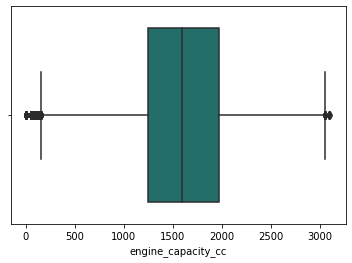

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,-2.177585,53.408598,Serious,2018,Two-wheeler,Male,25.0,Young Adult,999.0,Petrol,11.0,7.0,Urban area
1,-0.092945,51.379843,Slight,2020,Two-wheeler,Male,25.0,Young Adult,124.0,Petrol,3.0,5.0,Urban area
2,-1.853969,54.962991,Serious,2020,Two-wheeler,Male,25.0,Young Adult,125.0,Petrol,0.0,4.0,Urban area
3,-2.190595,53.853124,Slight,2018,Car,Female,28.0,Young Adult,998.0,Petrol,10.0,2.0,Urban area
4,-0.204440,51.488573,Serious,2019,Two-wheeler,Male,17.0,Teen,108.0,Petrol,2.0,8.0,Urban area
5,0.722184,52.084873,Slight,2019,Car,Male,71.0,Elderly,1968.0,Heavy oil,6.0,4.0,Rural
6,-1.750043,53.805929,Slight,2018,Car,Female,31.0,Young Adult,2993.0,Heavy oil,11.0,3.0,Urban area
8,-1.076592,53.515027,Slight,2019,Car,Female,18.0,Teen,1395.0,Petrol,1.0,3.0,Urban area
9,-0.420992,53.009885,Slight,2019,Car,Male,40.0,Adult,2967.0,Heavy oil,3.0,8.0,Urban area
10,-4.533413,55.826956,Serious,2019,Car,Female,42.0,Adult,898.0,Petrol,0.0,3.0,Urban area


In [44]:
# defining a function that takes a dataframe and a column label and returns the 
# same dataframe without the outlier values. The outlier values are being 
# calculated using the [Q1-1.5*IQR; Q3+1.5*IQR] range. Optionally, the function 
# can take a fixed lower and/or upper bound which is set disregarding the 
# previous IQR range.
def delete_outliers_iqr(dataframe, col, fixedlower=-99, fixedupper=-99):
    outliers = []
    sorted_data = sorted(dataframe[col])
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    if fixedlower != -99:
      lwr_bound = fixedlower
    if fixedupper != -99:
      upr_bound = fixedupper
    print(lwr_bound, upr_bound)
    for i in sorted_data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return dataframe[~dataframe[col].isin(outliers)]


print(df_train_clean.shape)
'''calling the previously defined fuction, to clean the engine capacity outliers, 
fixing its lower bound to 0, since many usefull data that is not an outlier
has 0 (electric) or low (motorcycles) engine capacity, that would be deleted 
otherwise'''
df_train_clean = delete_outliers_iqr(df_train_clean,'engine_capacity_cc',fixedlower=0)
print(df_train_clean.shape)

'''Dropping the outliers of age of vehicle, fixing lower bound to 0 as we need all 
vehicles from age 0 to be considered'''

df_train_clean = delete_outliers_iqr(df_train_clean,'age_of_vehicle',fixedlower=0)

#plotting a bloxplot to visualise the training set data without the outliers
sns.boxplot(data = df_train_clean, x = 'engine_capacity_cc')
plt.show()
df_train_clean.head(10)


## Converting categorical to dummy variables

This ensures the categorical variables with n - categories are converted into (n-1) seperate columns. The function below creates columns for all categories except the first category it encounters. This is necessary since having all categories will cause multicollinearity problems in the predictive model.

In [45]:
from sklearn.preprocessing import OneHotEncoder

def dummy_converter(df_, column):
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = df_[column].values.reshape(-1,1)

    transformed = one_hot_encoder.fit_transform(cat_vals)

    # put the transformed data as columns in the dataframe
    col_names = one_hot_encoder.categories_[0].tolist()[1:]
    for i, col_name in enumerate(col_names):
        df_[col_name] = transformed[:,i]
    return df_
cat_col_list = ['vehicle_type', 'sex_of_driver', 'age_band_of_driver', 'propulsion_code', 'driver_imd_decile', 'driver_home_area_type']

dummy_converter(df_train_clean, 'vehicle_type')

for i in cat_col_list:
     dummy_converter(df_train_clean, i)

        
# check if the dummies are produced correctly
df_train_clean.head()

,longitude,latitude,accident_severity,accident_year_y,vehicle_type,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,Heavy Cargo Vehicle,Heavy Passenger Vehicle,Two-wheeler,Male,Not Known,Child,Elderly,Teen,Young Adult,Heavy oil,Others,Petrol,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Small town,Urban area
0,-2.177585,53.408598,Serious,2018,Two-wheeler,Male,25.0,Young Adult,999.0,Petrol,11.0,7.0,Urban area,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.092945,51.379843,Slight,2020,Two-wheeler,Male,25.0,Young Adult,124.0,Petrol,3.0,5.0,Urban area,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.853969,54.962991,Serious,2020,Two-wheeler,Male,25.0,Young Adult,125.0,Petrol,0.0,4.0,Urban area,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-2.190595,53.853124,Slight,2018,Car,Female,28.0,Young Adult,998.0,Petrol,10.0,2.0,Urban area,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.204440,51.488573,Serious,2019,Two-wheeler,Male,17.0,Teen,108.0,Petrol,2.0,8.0,Urban area,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
#Creating dummies for testset
for j in cat_col_list:
  dummy_converter(df_test_clean,j)

### Export the data 

In [47]:
fileNameTrainset = 'trainset.csv'
fileNameTestset = "testset.csv"

# saving the excel
df_train_clean.to_csv(fileNameTrainset, index = False)
df_test_clean.to_csv(fileNameTestset, index = False)